## Data Science Programmentwurf am Beispieldatensatz mit Fahrzeugen

#### Kurs: Data Science (Wahlfach)
#### Abgabetermin: 18.04.2019
#### Gruppe: David Marchi & Yunus Emre Besogul

In [1]:
# All imports here...

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from math import sqrt
from sklearn.preprocessing import StandardScaler
from sklearn import tree, preprocessing, metrics, datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB

##### Reading the data

In [2]:
# 1. mpg (miles per gallon):           continuous
# 2. cylinders:     multi-valued discrete
# 3. displacement:  continuous
# 4. horsepower (hp):    continuous
# 5. weight:        continuous
# 6. acceleration:  continuous
# 7. model year (year):    multi-valued discrete
# 8. origin:        multi-valued discrete
# 9. car name (name):      string (unique for each instance)

# Set option to print pretty...
pd.set_option('display.max_columns', None)

# Read csv into as a variable "df" (with space and tab delimeter, remove header and rename columns as explained in "auto-mpg.names")
col_Names = ["mpg", "cylinders", "displacement", "hp", "weight", "acceleration", "year", "origin", "name"]
df = pd.read_csv("auto-mpg.data-original", sep='\t+|\s\s+', engine='python', header=None, names=col_Names)



#### Teil 1: Dieser Fahrzeugdatensatz ist mit Hilfe statistischer Standardfunktionen zu analysieren, zu interpretieren und ggfs. zu bereinigen. Nutzen Sie visuelle, möglichst in die Programmierumgebung eingebettete Darstellungsarten in verschiedenen Diagrammen, um wichtige Zusammenhänge zu visualisieren. Nutzen Sie Kommentare, um zu beschreiben, was jeweils Interessantes zu erkennen ist.

##### First analyze and clean up

In [3]:
# Analyzing:
print("Analyze the data first:")
df.info()


# Look for false entries (empty, NaN, N/A, ?, ...)
print("\nFalse data:")
print(df.isnull().any())


# Check dimension of Dataframe
print("\nDimension:")
print(df.shape)
# ... we have 406 rows of data


# ...we see that there is missing or corrupt data in mpg and horsepower (hp)
# ...8 mpg data is missing, and 6 horsepower (hp) data is missing


# Remove false entries...
df = df[df['mpg'].notnull()]
df = df[df['hp'].notnull()]


# Check dimension of Dataframe again
print("\nDimension after cleaning up:")
print(df.shape)
# ...this reduces our dataset to 392. Meaning 14 datarows were corrupt



Analyze the data first:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 9 columns):
mpg             398 non-null float64
cylinders       406 non-null float64
displacement    406 non-null float64
hp              400 non-null float64
weight          406 non-null float64
acceleration    406 non-null float64
year            406 non-null float64
origin          406 non-null float64
name            406 non-null object
dtypes: float64(8), object(1)
memory usage: 28.6+ KB

False data:
mpg              True
cylinders       False
displacement    False
hp               True
weight          False
acceleration    False
year            False
origin          False
name            False
dtype: bool

Dimension:
(406, 9)

Dimension after cleaning up:
(392, 9)


##### View some basic statistical details of the Dataframe

In [4]:
print("\nBasic statistical details:")
print(df.head())
print(df.describe())
# ...we have model years from 1970 to 1982
# ...we have 3 origins for a car (Herkunft)
# ...mpg is minimum 9 and maximum 46, but has an average of 24.44 with a variation of 7.8
# ...we will continue by seperating the dataset to the 3 origin types


Basic statistical details:
    mpg  cylinders  displacement     hp  weight  acceleration  year  origin  \
0  18.0        8.0         307.0  130.0  3504.0          12.0  70.0     1.0   
1  15.0        8.0         350.0  165.0  3693.0          11.5  70.0     1.0   
2  18.0        8.0         318.0  150.0  3436.0          11.0  70.0     1.0   
3  16.0        8.0         304.0  150.0  3433.0          12.0  70.0     1.0   
4  17.0        8.0         302.0  140.0  3449.0          10.5  70.0     1.0   

                          name  
0  "chevrolet chevelle malibu"  
1          "buick skylark 320"  
2         "plymouth satellite"  
3              "amc rebel sst"  
4                "ford torino"  
              mpg   cylinders  displacement          hp       weight  \
count  392.000000  392.000000    392.000000  392.000000   392.000000   
mean    23.445918    5.471939    194.411990  104.469388  2977.584184   
std      7.805007    1.705783    104.644004   38.491160   849.402560   
min      9.

##### Visualizing/plotting the data:

Draw scatterplots to see some relationships:


LinAlgError: singular matrix

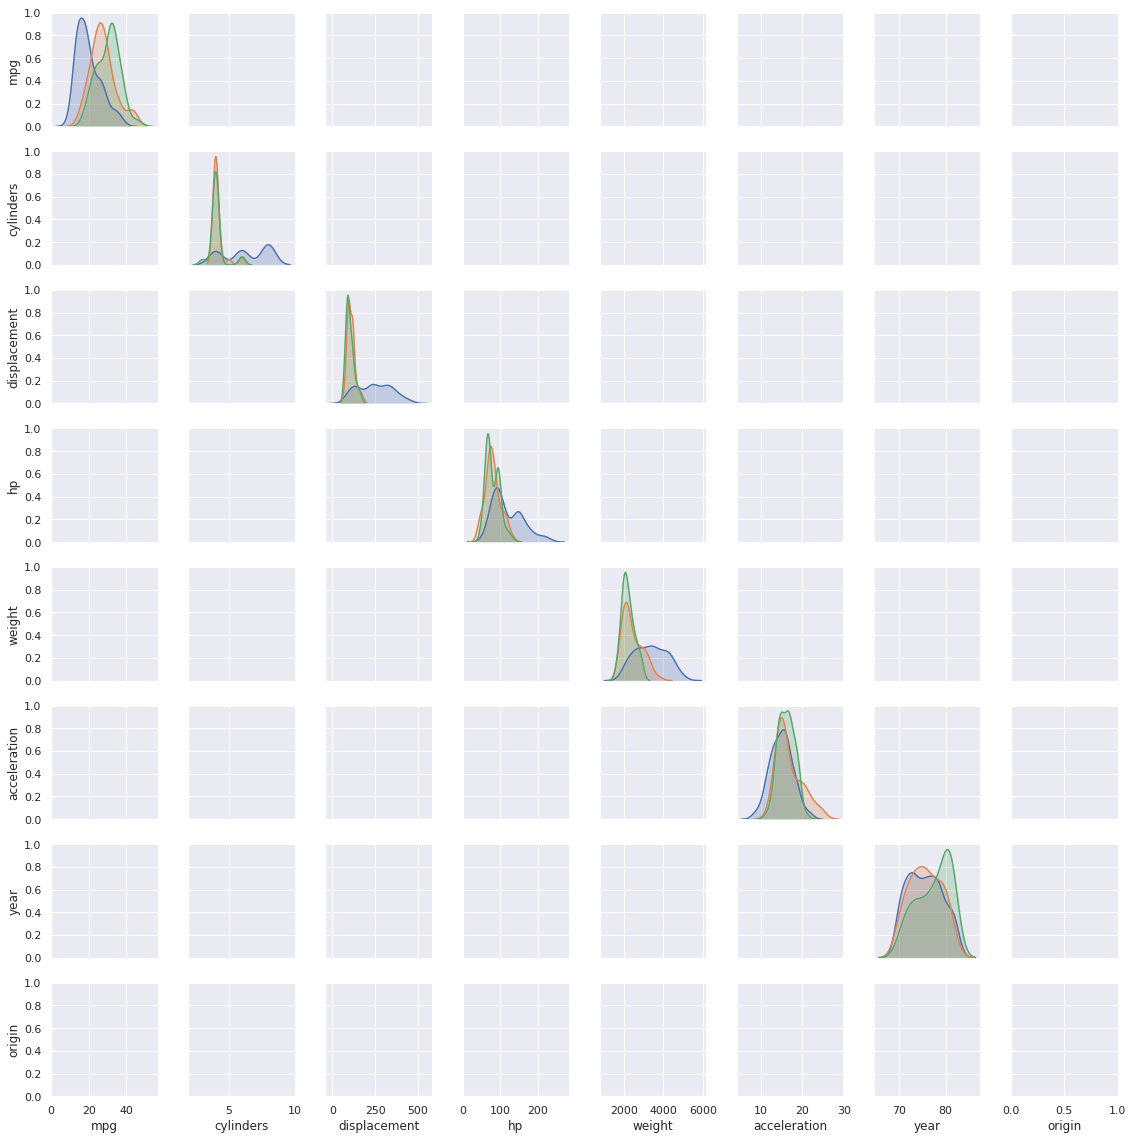

In [5]:
print("Draw scatterplots to see some relationships:")

# Scatterplot/Pairplot
sns.set()
sns.pairplot(df, height=2, hue ='origin', markers=["o", "s", "D"])
plt.show()


# We see alot of plots but let's have a closer look with different visualizations:


# mpg and year relationship
sns.catplot(x="year", y="mpg", data=df, kind="box")
plt.axhline(df.mpg.mean(),color='r',linestyle='dashed',linewidth=2)
# ...mpg gets higher of the years but reaches its maximum in 1980
# ...average of mpg is 24.44

# ...origin 1 has bad mgp to hp ratio
# ...origin 2 has the best mgp to hp ratio
# ...origin 3 has the good mpg to hp ratio, but worse than origin 2

# ...most cars from origin 1 have 4 cylinders

# ...origin 1 has bad fuel economy than origin 2. Origin 2 has a worse fuel economy than origin 3

# ...origin 1 have many displacements and less mpg (from 100cc to 400cc)
# ...origin 2 and 3 have a lower displacement but more mpg (from 100cc to 200cc)


# mpg and origin relationship
sns.catplot(x="year", y="mpg", data=df, col="origin", kind="box")
# ...mpg in origin 1 is below the average
# ...mpg in origin 2 is above the average
# ...mpg in origin 3 is above the average


# mpg and acceleration relationship makes no sense here
# mpg and horse power relationship makes no sense here
# mpg and weight relationship makes no sense here
# mpg and displacement relationship makes no sense here
# mpg and model name relationship makes no sense here


# mpg and cylinders relationship
sns.catplot(x="cylinders", y="mpg", data=df, kind="box")
plt.axhline(df.mpg.mean(),color='r',linestyle='dashed',linewidth=2)
sns.catplot(x="cylinders", y="mpg", data=df, col="origin", kind="box")
# ...origin 1 has 4, 6 or 8 cylinders
# ...origin 2 has 4, 5 or 6 cylinders
# ...origin 3 has 3, 4 or 6 cylinders
# ...having 4 or 5 cylinders means, havin mpg above average, while the rest gets mpg below average




#### Teil 2: Verwenden Sie zwei verschiedene Vorhersageverfahren, um die PS-Zahl anhand eines gegebenen Datensatzes ohne PS-Zahl vorherzusagen.

##### Linear Regression 

In [ ]:
# Predict horse power (hp) via given values
from numpy.polynomial.polynomial import polyfit

# Split data, to training and testing data to validate the model
# test data is 25 percent
df_x = df[['mpg', 'cylinders', 'displacement', 'weight', 'acceleration', 'year', 'origin']]
df_y = df[['hp']]

x = df_x.copy()
y = df_y.copy()

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=1)

# Create linear regression object and train the model
lr = LinearRegression(normalize=True)
lr.fit(X_train, y_train)

# Plot
plt.scatter(X_train['mpg'], y_train, color = 'red')
b, m = polyfit(X_train['mpg'], y_train, 1)
plt.plot(X_train['mpg'], y_train, '.')
plt.plot(X_train['mpg'], b + m * np.array(X_train['mpg']), '-')
plt.title('Training set')
plt.xlabel('mpg')
plt.ylabel('hp')
plt.show()


# Evaluating the result
ypred = lr.predict(X_test)

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, ypred))
#... MSE is 175.38 which is not such a great score, which can be seen in the plot (below the line does not correlate so good...)

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, ypred))
#... R2 score is 89% which is good



##### Decision Trees

In [ ]:
# Predict horse power (hp) via given values

# Create Decision Tree regression object and train the model
regressor = DecisionTreeRegressor()  
regressor.fit(X_train, y_train) 

# Predict
ypred = regressor.predict(X_test)  

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, ypred))
#... MSE is 227.07 which is worse than un-optimized Linear Regression (LR: 175.38)

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, ypred))
#... R2 score is 86% which is worse than un-optimized Linear Regression (LR: 89%)


##### We decide here for linear regression. LR has a better score and a lower MSE for the same data set compared to Decision Trees . We are also motivated to optimize LR

##### Optimizing Linear Regression

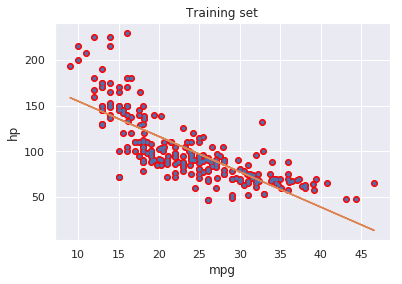

Mean squared error: 141.40
Variance score: 0.91


In [6]:
# Predict horse power (hp) via given values
from numpy.polynomial.polynomial import polyfit


# ...if we kick weight and year, we get better results
# ...if we increase our test_size, we get better results => train algorithm with 63%

df_x = df[['mpg', 'cylinders', 'displacement', 'acceleration', 'origin']]
df_y = df[['hp']]

X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.37, random_state=1)

# Create linear regression object and train the model
lr = LinearRegression(normalize=True)
lr.fit(X_train, y_train)

# Evaluating the result
ypred = lr.predict(X_test)

# Plot
plt.scatter(X_train['mpg'], y_train, color = 'red')
b, m = polyfit(X_train['mpg'], y_train, 1)
plt.plot(X_train['mpg'], y_train, '.')
plt.plot(X_train['mpg'], b + m * np.array(X_train['mpg']), '-')
plt.title('Training set')
plt.xlabel('mpg')
plt.ylabel('hp')
plt.show()

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, ypred))
#... MSE is 141.40 (before: 175.38) which is a great score and better than before

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, ypred))
#... R2 score is 91% (before: 89%) which is much better than before


# ...More ways to optimize it would be to play with the number of incrementation steps, 
# ...play with the input variables, change parameters, change dimension, ...

##### Writing Method to predict horsepower with values of 'mpg', 'cylinders', 'displacement', 'acceleration', 'origin'

In [7]:
# example: [[18,8,307,12,1]] => 130 hp

def predict_horsepower(mpg, cylinders, displacement, acceleration, origin):
    hp = lr.predict([[mpg,cylinders,displacement,acceleration,origin]])
    print("The horesepower for the given data is: ")
    print(hp)
    return hp

print("Hello form horsepower predictor!")

print("Please type in the mpg of your car:")
mpg = input()

print("Please type in the number of cylinders of your car:")
cylinders = input()

print("Please type in the number of displacement of your car:")
displacement = input()

print("Please type in the acceleration of your car:")
acceleration = input()

print("Please type in the origin of your car:")
origin = input()

hp = predict_horsepower(float(mpg), float(cylinders), float(displacement), float(acceleration), float(origin))


Hello form horsepower predictor!
Please type in the mpg of your car:


KeyboardInterrupt: 

#### Teil 3: Nutzen Sie zwei Klassifikationsverfahren, um ein Fahrzeug bei sonstigen gegebenen Daten einer Zylinderzahl zuzuordnen

In [77]:
# Data Preperation
#print(df['cylinders'].value_counts())

df_x = df[['mpg', 'hp', 'displacement', 'weight', 'acceleration', 'year', 'origin']]
df_y = df[['cylinders']]

X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.25, random_state=1)


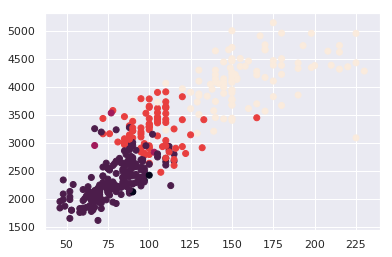

In [78]:
import matplotlib.pyplot as plt
plt.scatter(df_x.hp,df_x.weight,c=df_y.cylinders)
plt.show()


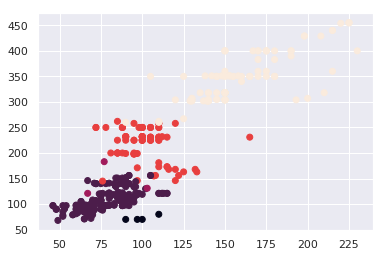

In [79]:
plt.scatter(df_x.hp,df_x.displacement,c=df_y.cylinders)
plt.show()

##### KNN 

In [80]:
# Predict cylinders via given values

model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train.values.ravel())

target_pred = model.predict(X_test)
accuracy_score(y_test, target_pred)

0.9285714285714286

In [85]:
##### Improved KNN, reduce features, based on Graphs above. 

model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train[['hp', 'displacement']], y_train.values.ravel())

target_pred = model.predict(X_test[['hp', 'displacement']])
accuracy_score(y_test, target_pred)

0.9693877551020408

In [89]:
def predict_cylinder(hp, displacement):
    cylinders = model.predict([[hp, displacement]])
    print("The cylinders for the given data is: ")
    print(cylinders)
    return cylinders

print("Hello form cylinder predictor!")

print("Please type in the hp of your car:")
mpg = input()

print("Please type in the number of displacement of your car:")
displacement = input()

cylinders = predict_cylinder(float(mpg), float(displacement))

Hello form cylinder predictor!
Please type in the hp of your car:
50
Please type in the number of displacement of your car:
50
The cylinders for the given data is: 
[4.]


##### Naive Bayes

In [53]:
model = MultinomialNB() #BernoulliNB() #MultinomialNB() #GaussianNB()
predicted = model.fit(X_train, y_train.values.ravel())

target_pred = model.predict(X_test)
accuracy_score(y_test, target_pred)

0.9693877551020408